In [100]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re


In [68]:
df = pd.read_csv("Stats_survey.csv")

df

,Timestamp,Your Sex?,Your Matric (grade 12) Average/ GPA (in %),What year were you in last year (2023) ?,What faculty does your degree fall under?,Your 2023 academic year average/GPA in % (Ignore if you are 2024 1st year student),Your Accommodation Status Last Year (2023),Monthly Allowance in 2023,Were you on scholarship/bursary in 2023?,Additional amount of studying (in hrs) per week,How often do you go out partying/socialising during the week?,"On a night out, how many alcoholic drinks do you consume?","How many classes do you miss per week due to alcohol reasons, (i.e: being hungover or too tired?)",How many modules have you failed thus far into your studies?,Are you currently in a romantic relationship?,Do your parents approve alcohol consumption?,How strong is your relationship with your parent/s?
0,2024/03/07 5:12:01 pm EET,Female,76.0,2nd Year,Arts & Social Sciences,72.0,Private accommodation/ stay with family/friends,R 4001- R 5000,No,8+,Only weekends,8+,3,0,Yes,Yes,Very close
1,2024/03/07 5:12:08 pm EET,Male,89.0,2nd Year,Economic & Management Sciences,75.0,Private accommodation/ stay with family/friends,R 7001 - R 8000,"Yes (NSFAS, etc...)",8+,Only weekends,3-5,4+,0,No,Yes,Very close
2,2024/03/07 5:12:25 pm EET,Male,76.0,1st Year,AgriSciences,55.0,Private accommodation/ stay with family/friends,R 4001- R 5000,No,3-5,2,8+,3,0,No,Yes,Very close
3,2024/03/07 5:12:28 pm EET,Male,89.0,2nd Year,Engineering,84.0,Private accommodation/ stay with family/friends,R 6001 - R 7000,No,3-5,3,8+,2,0,Yes,Yes,Very close
4,2024/03/07 5:13:00 pm EET,Female,74.0,2nd Year,Arts & Social Sciences,52.0,Private accommodation/ stay with family/friends,R 4001- R 5000,No,3-5,Only weekends,5-8,1,3,No,Yes,Fair
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401,2024/03/12 11:05:33 am EET,Female,74.0,NaN,Science,NaN,Private accommodation/ stay with family/friends,NaN,No,3-5,3,1-3,0,0,No,Yes,Close
402,2024/03/12 3:26:14 pm EET,Female,73.0,2nd Year,Economic & Management Sciences,58.0,Private accommodation/ stay with family/friends,R 6001 - R 7000,"Yes (NSFAS, etc...)",5-8,1,8+,0,0,Yes,Yes,Very close
403,2024/03/13 10:32:19 pm EET,Female,86.0,1st Year,NaN,NaN,Private accommodation/ stay with family/friends,R 4001- R 5000,No,5-8,2,3-5,1,0,No,Yes,Very close
404,2024/03/13 10:32:27 pm EET,Male,85.0,NaN,Economic & Management Sciences,NaN,Private accommodation/ stay with family/friends,R 4001- R 5000,No,1-3,4+,5-8,4+,0,No,Yes,Close


In [69]:
df.rename(columns={
        "Timestamp": "Timestamp",
        "Your Sex?": "Sex",
        "Your Matric (grade 12) Average/ GPA (in %)": "Matric_GPA",
        "What year were you in last year (2023) ?": "Year",
        "What faculty does your degree fall under?": "Faculty",
        "Your 2023 academic year average/GPA in % (Ignore if you are 2024 1st year student)": "Yearly_GPA",
        "Your Accommodation Status Last Year (2023)": "Accommodation",
        "Monthly Allowance in 2023": "Monthly_Allowance",
        "Were you on scholarship/bursary in 2023?": "Scholarship",
        "Additional amount of studying (in hrs) per week": "Study_Hours",
        "How often do you go out partying/socialising during the week? ": "Socialising_Frequency",
        "On a night out, how many alcoholic drinks do you consume?": "Drinks_Per_Night",
        "How many classes do you miss per week due to alcohol reasons, (i.e: being hungover or too tired?)": "Missed_Classes",
        "How many modules have you failed thus far into your studies?": "Modules_Failed",
        "Are you currently in a romantic relationship?": "In_Relationship",
        "Do your parents approve alcohol consumption?": "Parents_Approve",
        "How strong is your relationship with your parent/s?": "Relationship_Parents",
    }, inplace=True)

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Timestamp              406 non-null    object 
 1   Sex                    404 non-null    object 
 2   Matric_GPA             399 non-null    float64
 3   Year                   333 non-null    object 
 4   Faculty                399 non-null    object 
 5   Yearly_GPA             320 non-null    float64
 6   Accommodation          383 non-null    object 
 7   Monthly_Allowance      375 non-null    object 
 8   Scholarship            398 non-null    object 
 9   Study_Hours            403 non-null    object 
 10  Socialising_Frequency  404 non-null    object 
 11  Drinks_Per_Night       404 non-null    object 
 12  Missed_Classes         403 non-null    object 
 13  Modules_Failed         403 non-null    object 
 14  In_Relationship        403 non-null    object 
 15  Parent

In [70]:
# Počet záznamů v každém sloupci
record_count = df.count()

# Počet chybějících hodnot v každém sloupci
missing_values = df.isnull().sum()

# Počet unikátních hodnot v každém sloupci
unique_values = df.nunique()

# Vytvoříme DataFrame, který shrnuje všechny výsledky
summary_df = pd.DataFrame({
    'Record_Count': record_count,
    'Missing_Values': missing_values,
    'Unique_Values': unique_values
})

summary_df



,Record_Count,Missing_Values,Unique_Values
Timestamp,406,0,400
Sex,404,2,2
Matric_GPA,399,7,43
Year,333,73,5
Faculty,399,7,8
Yearly_GPA,320,86,45
Accommodation,383,23,2
Monthly_Allowance,375,31,5
Scholarship,398,8,2
Study_Hours,403,3,5


In [71]:
# Předpokládaný formát dat ve sloupci Timestamp
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Ověření změny
df.head()


C:\Users\HanaPanošová\AppData\Local\Temp\ipykernel_23332\3680623934.py:2: FutureWarning: Parsed string "2024/03/07 5:12:01 pm EET" included an un-recognized timezone "EET". Dropping unrecognized timezones is deprecated; in a future version this will raise. Instead pass the string without the timezone, then use .tz_localize to convert to a recognized timezone.
  df['Timestamp'] = pd.to_datetime(df['Timestamp'])
C:\Users\HanaPanošová\AppData\Local\Temp\ipykernel_23332\3680623934.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Timestamp'] = pd.to_datetime(df['Timestamp'])
C:\Users\HanaPanošová\AppData\Local\Temp\ipykernel_23332\3680623934.py:2: FutureWarning: Parsed string "2024/03/07 5:12:08 pm EET" included an un-recognized timezone "EET". Dropping unrecognized timezones is deprecated; in a future version this will raise. Instead pass the st

,Timestamp,Sex,Matric_GPA,Year,Faculty,Yearly_GPA,Accommodation,Monthly_Allowance,Scholarship,Study_Hours,Socialising_Frequency,Drinks_Per_Night,Missed_Classes,Modules_Failed,In_Relationship,Parents_Approve,Relationship_Parents
0,2024-03-07 17:12:01,Female,76.0,2nd Year,Arts & Social Sciences,72.0,Private accommodation/ stay with family/friends,R 4001- R 5000,No,8+,Only weekends,8+,3,0,Yes,Yes,Very close
1,2024-03-07 17:12:08,Male,89.0,2nd Year,Economic & Management Sciences,75.0,Private accommodation/ stay with family/friends,R 7001 - R 8000,"Yes (NSFAS, etc...)",8+,Only weekends,3-5,4+,0,No,Yes,Very close
2,2024-03-07 17:12:25,Male,76.0,1st Year,AgriSciences,55.0,Private accommodation/ stay with family/friends,R 4001- R 5000,No,3-5,2,8+,3,0,No,Yes,Very close
3,2024-03-07 17:12:28,Male,89.0,2nd Year,Engineering,84.0,Private accommodation/ stay with family/friends,R 6001 - R 7000,No,3-5,3,8+,2,0,Yes,Yes,Very close
4,2024-03-07 17:13:00,Female,74.0,2nd Year,Arts & Social Sciences,52.0,Private accommodation/ stay with family/friends,R 4001- R 5000,No,3-5,Only weekends,5-8,1,3,No,Yes,Fair


In [72]:
# Checking the actual column names to match them correctly with the user's request
columns_to_check = ["Sex", "Accommodation", "Monthly_Allowance", "Parents_Approve", "Faculty"]

# Extracting unique values and their counts for the specified columns
unique_values_counts = {col: df[col].value_counts(dropna=False) for col in columns_to_check}

unique_values_counts


{'Sex': Sex
 Male      216
 Female    188
 NaN         2
 Name: count, dtype: int64,
 'Accommodation': Accommodation
 Private accommodation/ stay with family/friends    335
 Non-private accommodation ie. Res                   48
 NaN                                                 23
 Name: count, dtype: int64,
 'Monthly_Allowance': Monthly_Allowance
 R 4001- R 5000     159
 R 5001 - R 6000    101
 R 6001 - R 7000     58
 NaN                 31
 R 7001 - R 8000     30
 R 8000+             27
 Name: count, dtype: int64,
 'Parents_Approve': Parents_Approve
 Yes    353
 No      49
 NaN      4
 Name: count, dtype: int64,
 'Faculty': Faculty
 Economic & Management Sciences    211
 Science                            56
 Arts & Social Sciences             47
 Engineering                        37
 AgriSciences                       22
 Medicine and Health Services       10
 Law                                10
 NaN                                 7
 Education                           6
 Nam

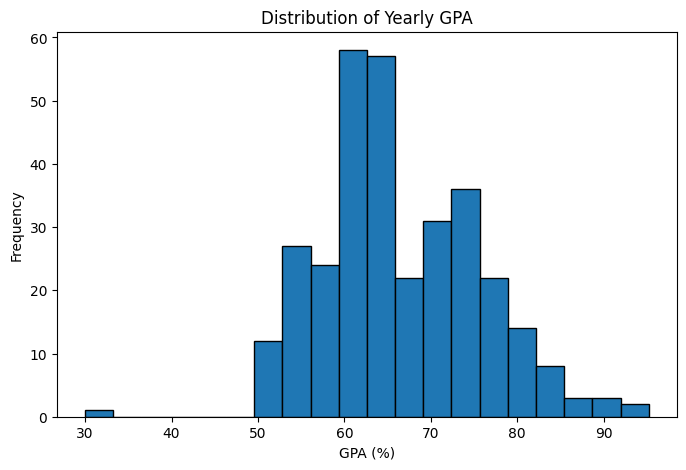

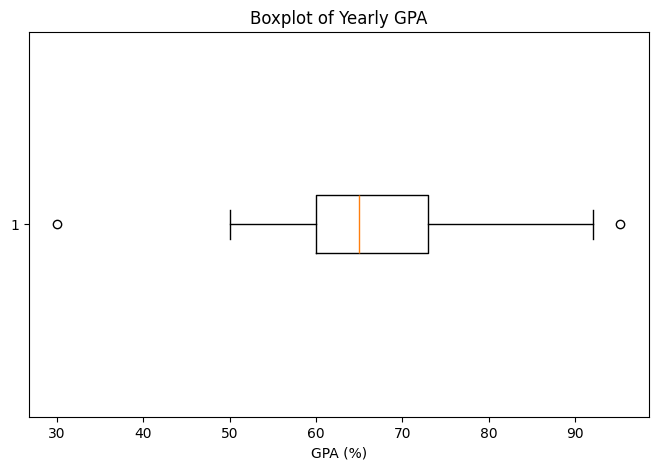

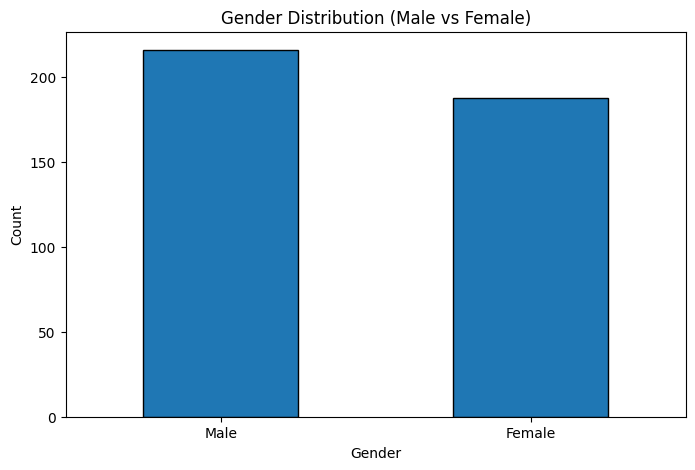

73     95.22
303    30.00
Name: Yearly_GPA, dtype: float64

In [73]:
# Verifying the correct column name
gpa_column = 'Yearly_GPA'

# Visualize the distribution of Yearly GPA with both histogram and boxplot
plt.figure(figsize=(8, 5))
plt.hist(df[gpa_column].dropna(), bins=20, edgecolor='black')
plt.title('Distribution of Yearly GPA')
plt.xlabel('GPA (%)')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(8, 5))
plt.boxplot(df[gpa_column].dropna(), vert=False)
plt.title('Boxplot of Yearly GPA')
plt.xlabel('GPA (%)')
plt.show()

# Identify outliers in Yearly GPA
yearly_gpa = df[gpa_column].dropna()
q1 = yearly_gpa.quantile(0.25)
q3 = yearly_gpa.quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = yearly_gpa[(yearly_gpa < lower_bound) | (yearly_gpa > upper_bound)]

# Bar chart for gender distribution
plt.figure(figsize=(8, 5))
df['Sex'].value_counts().plot(kind='bar', edgecolor='black')
plt.title('Gender Distribution (Male vs Female)')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# Display outliers
outliers


In [74]:
df_no_allowance = df[df["Monthly_Allowance"].notna()]

df_no_allowance.info()

<class 'pandas.core.frame.DataFrame'>
Index: 375 entries, 0 to 405
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Timestamp              375 non-null    datetime64[ns]
 1   Sex                    375 non-null    object        
 2   Matric_GPA             371 non-null    float64       
 3   Year                   318 non-null    object        
 4   Faculty                371 non-null    object        
 5   Yearly_GPA             306 non-null    float64       
 6   Accommodation          360 non-null    object        
 7   Monthly_Allowance      375 non-null    object        
 8   Scholarship            373 non-null    object        
 9   Study_Hours            374 non-null    object        
 10  Socialising_Frequency  375 non-null    object        
 11  Drinks_Per_Night       375 non-null    object        
 12  Missed_Classes         374 non-null    object        
 13  Modules_Fa

In [75]:
# Definujeme funkci pro výpočet středové hodnoty
def calculate_midpoint(value):
    # Pokud je hodnota NaN, vrátíme ji tak, jak je
    if pd.isna(value):
        return value
    
    # Použijeme regulární výraz k extrahování čísel z textu
    match = re.findall(r'\d+', value)
    
    # Pokud najdeme dvě čísla (rozsah), vypočítáme středovou hodnotu
    if len(match) == 2:
        low, high = map(int, match)
        return (low + high) // 2  # Středová hodnota
    
    # Pokud je to např. "R 8000+", vrátíme hodnotu jako 8000 nebo vyšší (zvolíme 8000 jako reprezentativní hodnotu)
    elif len(match) == 1:
        return int(match[0])  # Použijeme číslo přímo
    
    # Pokud nic nevyhovuje, vrátíme původní hodnotu
    return value

# Aplikujeme funkci na sloupec 'Monthly Allowance'
df_no_allowance['Monthly_Allowance'] = df_no_allowance['Monthly_Allowance'].apply(calculate_midpoint)

# Zobrazíme aktualizovaný sloupec
df_no_allowance['Monthly_Allowance'].head()


C:\Users\HanaPanošová\AppData\Local\Temp\ipykernel_23332\3171056892.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_allowance['Monthly_Allowance'] = df_no_allowance['Monthly_Allowance'].apply(calculate_midpoint)


0    4500
1    7500
2    4500
3    6500
4    4500
Name: Monthly_Allowance, dtype: int64

In [109]:
# Filtrování řádků, které ve sloupci 'Faculty' obsahují řetězec 'Postgraduate'
postgraduate_data = df[df['Year'].str.contains('Postgraduate', na=False)]

# Výpis záznamů, které obsahují 'Postgraduate' ve sloupci 'Faculty'
postgraduate_data


,Timestamp,Sex,Matric_GPA,Year,Faculty,Yearly_GPA,Accommodation,Monthly_Allowance,Scholarship,Study_Hours,Socialising_Frequency,Drinks_Per_Night,Missed_Classes,Modules_Failed,In_Relationship,Parents_Approve,Relationship_Parents
119,2024-03-07 18:07:35,Female,76.0,Postgraduate,Economic & Management Sciences,79.0,Private accommodation/ stay with family/friends,R 8000+,No,5-8,2,1-3,0,0,No,Yes,Very close
138,2024-03-07 18:26:53,Male,70.0,Postgraduate,AgriSciences,68.0,Private accommodation/ stay with family/friends,R 4001- R 5000,No,1-3,3,3-5,2,0,No,Yes,Very close
266,2024-03-07 23:30:21,Male,82.0,Postgraduate,Engineering,62.0,Private accommodation/ stay with family/friends,R 7001 - R 8000,No,8+,1,8+,0,1,Yes,Yes,Very close
274,2024-03-07 23:46:09,Male,95.5,Postgraduate,Engineering,65.0,Private accommodation/ stay with family/friends,R 4001- R 5000,"Yes (NSFAS, etc...)",8+,3,8+,0,0,Yes,Yes,Fair
357,2024-03-11 14:06:31,Male,85.0,Postgraduate,AgriSciences,78.0,Private accommodation/ stay with family/friends,R 6001 - R 7000,No,8+,3,8+,0,0,Yes,Yes,Very close


In [108]:
df_cleared = df_no_allowance[df_no_allowance["Year"] != "Postgraduate"]

df_cleared.info()

<class 'pandas.core.frame.DataFrame'>
Index: 370 entries, 0 to 405
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Timestamp              370 non-null    datetime64[ns]
 1   Sex                    370 non-null    object        
 2   Matric_GPA             366 non-null    float64       
 3   Year                   313 non-null    object        
 4   Faculty                366 non-null    object        
 5   Yearly_GPA             301 non-null    float64       
 6   Accommodation          355 non-null    object        
 7   Monthly_Allowance      370 non-null    int64         
 8   Scholarship            368 non-null    object        
 9   Study_Hours            369 non-null    object        
 10  Socialising_Frequency  370 non-null    object        
 11  Drinks_Per_Night       370 non-null    object        
 12  Missed_Classes         369 non-null    object        
 13  Modules_Fa

In [77]:
table = pd.crosstab(df["Faculty"], df["Sex"])

table

Sex,Female,Male
Faculty,,
AgriSciences,8,14
Arts & Social Sciences,31,16
Economic & Management Sciences,85,126
Education,6,0
Engineering,12,25
Law,6,4
Medicine and Health Services,8,2
Science,27,29


In [104]:
# Creating a contingency table to analyze the relationship between drinks consumed and faculty
drinks_faculty_contingency = pd.crosstab(df['Drinks_Per_Night'], df['Faculty'], normalize="columns").style.format("{:.0%}")

drinks_faculty_contingency



Faculty,AgriSciences,Arts & Social Sciences,Economic & Management Sciences,Education,Engineering,Law,Medicine and Health Services,Science
Drinks_Per_Night,,,,,,,,
0,5%,4%,6%,0%,5%,0%,0%,14%
1-3,14%,21%,22%,33%,19%,20%,40%,25%
3-5,18%,26%,18%,17%,30%,20%,30%,29%
5-8,27%,28%,29%,50%,27%,40%,20%,18%
8+,36%,21%,24%,0%,19%,20%,10%,14%


In [170]:
# Creating a contingency table to analyze the relationship between drinks consumed and faculty
drinks_faculty_contingency_cleared = pd.crosstab(df_cleared['Drinks_Per_Night'], df_cleared['Faculty'], normalize="columns").style.format("{:.2%}")

drinks_faculty_contingency_cleared

Faculty,AgriSciences,Arts & Social Sciences,Economic & Management Sciences,Education,Engineering,Law,Medicine and Health Services,Science
Drinks_Per_Night,,,,,,,,
0,0.00%,4.55%,5.05%,0.00%,6.06%,0.00%,0.00%,16.33%
1-3,16.67%,18.18%,22.22%,40.00%,18.18%,20.00%,33.33%,22.45%
3-5,16.67%,25.00%,19.19%,0.00%,30.30%,20.00%,33.33%,30.61%
5-8,27.78%,29.55%,28.79%,60.00%,30.30%,40.00%,22.22%,16.33%
8+,38.89%,22.73%,24.75%,0.00%,15.15%,20.00%,11.11%,14.29%


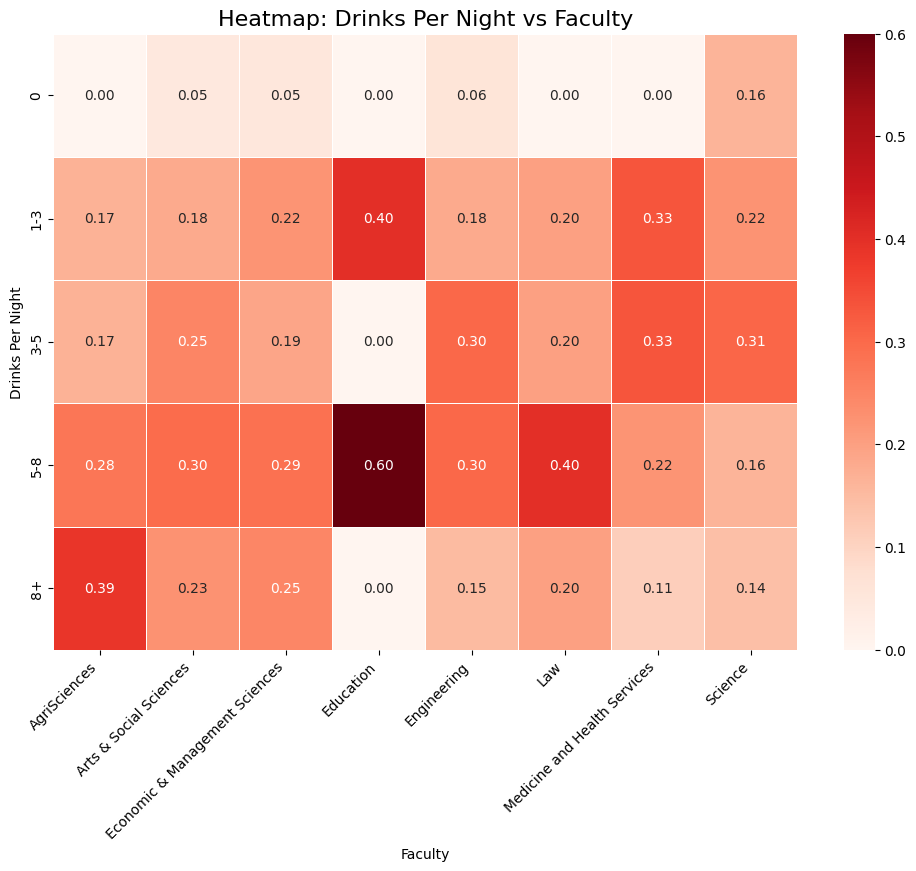

In [115]:
# Vytvoření kontingenční tabulky s normalizací podle sloupců
drinks_faculty_contingency = pd.crosstab(df_cleared['Drinks_Per_Night'], df_cleared['Faculty'], normalize='columns')

# Vykreslení heatmapy
plt.figure(figsize=(12, 8))
sns.heatmap(drinks_faculty_contingency, annot=True, fmt=".2f", cmap="Reds", linewidths=0.5)

plt.xticks(rotation=45, ha='right')

# Přidání názvů a popisků
plt.title("Heatmap: Drinks Per Night vs Faculty", fontsize=16)
plt.xlabel("Faculty")
plt.ylabel("Drinks Per Night")

# Zobrazení heatmapy
plt.show()


Hypotéza 1: studenti jakých fakult mají vyšší riziko rizikového pití?

AgriSciences: 38.89% of students fall into the "8+ drinks" category, with 27.77% in the "5-8 drinks" range.
Economic & Management Sciences: A significant portion of students (28.78%) fall into the "5-8 drinks" category, with a relatively even spread across other ranges.
Arts & Social Sciences: The percentages are more evenly distributed, with 29.55% of students in the "5-8 drinks" category.

In [160]:
#Creating bins and labels to group data into logical sections

df_cleared["Metric_GPA_Normalized"] = pd.cut(df_cleared["Matric_GPA"],
                                  labels=["Very Poor", "Poor", "Good", "Very Good", "Excelent"],
                                  bins=[0,60,70,80,90,100 ],
)

df_cleared

#Creating a contingency table to analyze the relationship between socializing frequency and GPA
drinks_frequency_cont = pd.crosstab(df_cleared['Socialising_Frequency'], df_cleared['Metric_GPA_Normalized'], normalize="index").style.format("{:.0%}")

drinks_frequency_cont



C:\Users\HanaPanošová\AppData\Local\Temp\ipykernel_23332\2477552676.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleared["Metric_GPA_Normalized"] = pd.cut(df_cleared["Matric_GPA"],


Metric_GPA_Normalized,Very Poor,Poor,Good,Very Good,Excelent
Socialising_Frequency,,,,,
0,7%,7%,60%,27%,0%
1,1%,8%,56%,33%,2%
2,1%,12%,54%,31%,1%
3,0%,16%,57%,27%,0%
4+,0%,25%,38%,31%,6%
Only weekends,2%,11%,50%,31%,6%


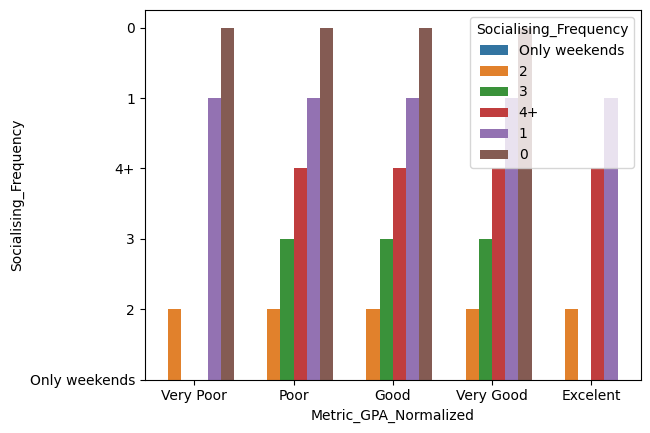

In [165]:
ax = sns.barplot(data = df_cleared,
                 x = "Metric_GPA_Normalized",
                 y = "Socialising_Frequency",
                 errorbar=None,
                 hue = "Socialising_Frequency",
                 #palette="Reds"
                 )

plt.gca().invert_yaxis()



In [161]:
#Creating a contingency table to analyze the relationship between socializing frequency and GPA
drinks_amount_cont = pd.crosstab(df_cleared['Drinks_Per_Night'], df_cleared['Metric_GPA_Normalized'], normalize="index").style.format("{:.0%}")

drinks_amount_cont

Metric_GPA_Normalized,Very Poor,Poor,Good,Very Good,Excelent
Drinks_Per_Night,,,,,
0,10%,10%,52%,19%,10%
1-3,0%,9%,57%,28%,6%
3-5,0%,11%,45%,43%,1%
5-8,3%,10%,58%,29%,0%
8+,0%,19%,54%,25%,2%


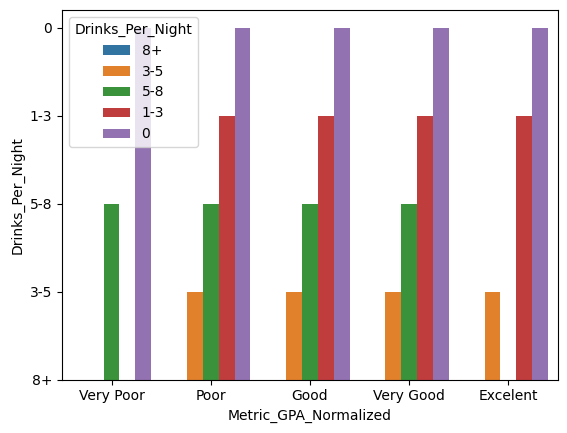

In [159]:
ax = sns.barplot(data = df_cleared,
                 x = "Metric_GPA_Normalized",
                 y = "Drinks_Per_Night",
                 errorbar=None,
                 hue = "Drinks_Per_Night",
                 #palette="Reds"
                 )

plt.gca().invert_yaxis()

C:\Users\HanaPanošová\AppData\Local\Temp\ipykernel_23332\310706219.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gpa_counts = df_cleared.groupby("Metric_GPA_Normalized").size().reset_index(name='Count')
C:\Users\HanaPanošová\AppData\Local\Temp\ipykernel_23332\310706219.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=gpa_counts,


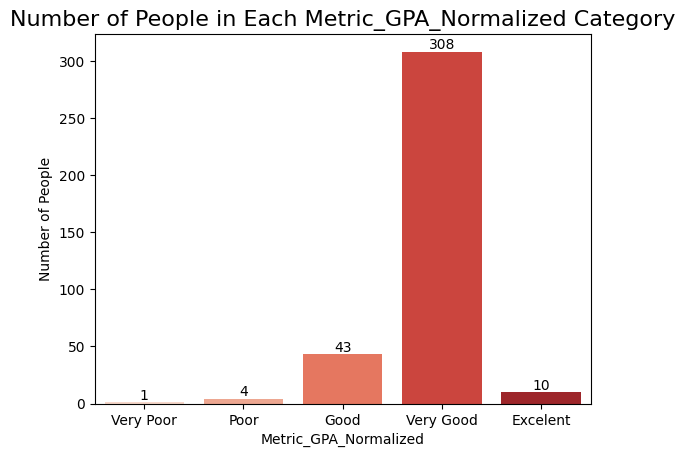

In [152]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df_cleared is already defined and the necessary columns exist

# Calculate the counts of each category in Metric_GPA_Normalized
gpa_counts = df_cleared.groupby("Metric_GPA_Normalized").size().reset_index(name='Count')

# Create the barplot
ax = sns.barplot(data=gpa_counts,
                 x="Metric_GPA_Normalized",
                 y="Count",
                 palette="Reds")

# Adding values (number of people in each Metric_GPA_Normalized category) to the bars
for i in ax.containers:
    ax.bar_label(i, fmt='%d')

# Adding titles and labels
plt.title("Number of People in Each Metric_GPA_Normalized Category", fontsize=16)
plt.xlabel("Metric_GPA_Normalized")
plt.ylabel("Number of People")

# Show the plot
plt.show()
